In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv("/Users/sjb373/data/secure-compression-framework-lib/sjb_local/sql/whatsapp_stats_complete.csv")
data["compression_ratio"] = data.raw_bytes/data.compressed_bytes
data["simple_safe_compression_ratio"] = data.raw_bytes/data.safe_compressed_bytes_simple
data["advanced_safe_compression_ratio"] = data.raw_bytes/data.safe_compressed_bytes_advanced
data["raw_bytes_mb"] = data.raw_bytes/1000000
data.head()

,n,m,dist,raw_bytes,compressed_bytes,safe_compressed_bytes_simple,safe_compressed_bytes_advanced,compression_ratio,simple_safe_compression_ratio,advanced_safe_compression_ratio,raw_bytes_mb
0,5,1000,even,1302528,129179,201558,-1,10.083125,6.462299,-1302528.0,1.302528
1,5,1000,random,1298432,129188,202786,-1,10.050717,6.402967,-1298432.0,1.298432
2,5,1000,long_tail,1298432,128337,213750,-1,10.117363,6.074536,-1298432.0,1.298432
3,5,5000,even,2199552,563647,630310,-1,3.902357,3.489635,-2199552.0,2.199552
4,5,5000,random,2191360,562894,627053,-1,3.893024,3.494697,-2191360.0,2.191360


In [33]:
mdata = data.drop(columns=["compression_ratio", "simple_safe_compression_ratio", "advanced_safe_compression_ratio"]).melt(id_vars=["n", "m", "dist"], value_vars=["compressed_bytes", "safe_compressed_bytes_advanced", "safe_compressed_bytes_simple"])
mdata["value_mb"] = mdata.value/1000000
mdata.head()

,n,m,dist,variable,value,value_mb
0,5,1000,even,compressed_bytes,129179,0.129179
1,5,1000,random,compressed_bytes,129188,0.129188
2,5,1000,long_tail,compressed_bytes,128337,0.128337
3,5,5000,even,compressed_bytes,563647,0.563647
4,5,5000,random,compressed_bytes,562894,0.562894


In [34]:
ndata = data.melt(id_vars=["n", "m", "dist"], value_vars=["compression_ratio", "simple_safe_compression_ratio", "advanced_safe_compression_ratio"])
ndata["value_kb"] = mdata.value/1000
ndata.head()

,n,m,dist,variable,value,value_kb
0,5,1000,even,compression_ratio,10.083125,129.179
1,5,1000,random,compression_ratio,10.050717,129.188
2,5,1000,long_tail,compression_ratio,10.117363,128.337
3,5,5000,even,compression_ratio,3.902357,563.647
4,5,5000,random,compression_ratio,3.893024,562.894


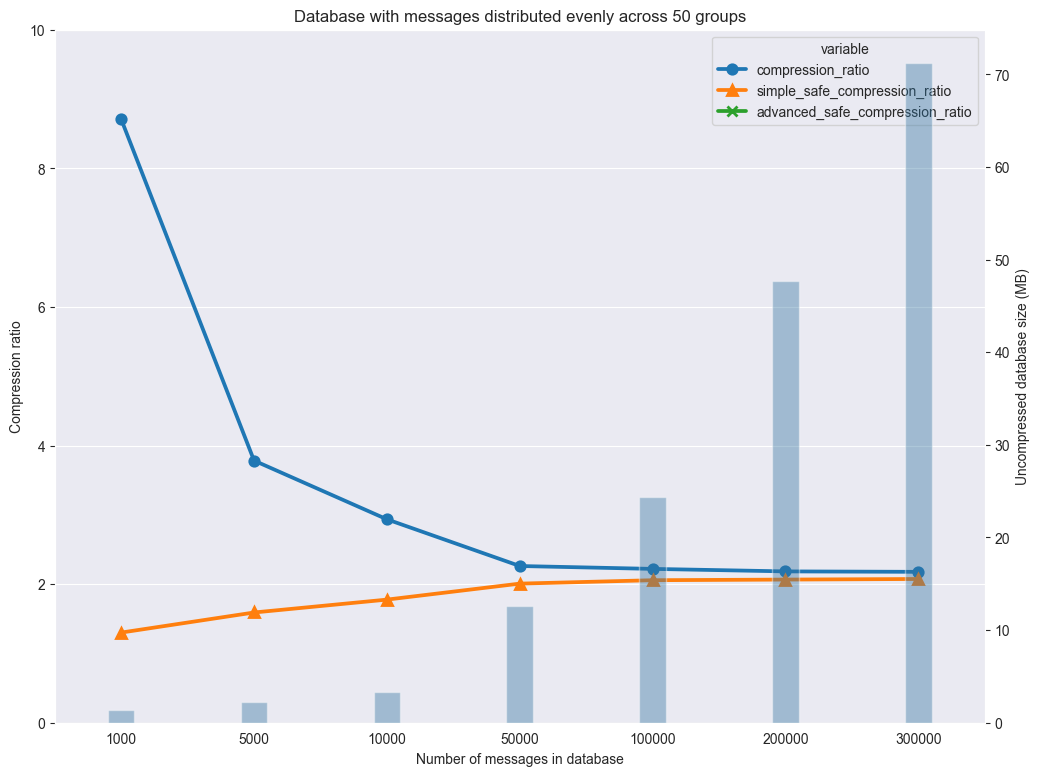

In [41]:
fig = plt.figure(figsize=(12, 9))
ax= fig.gca()
ax2=ax.twinx()
n = 50

# Uncompressed size
sns.barplot(data[(data.dist == "even") & (data.n == n)], x="m", y="raw_bytes_mb", ax=ax2, width=0.2, alpha=0.4)
ax2.set_ylabel("Uncompressed database size (MB)")
ax2.grid(False)

# Compression ratio
sns.pointplot(ndata[(ndata.dist == "even") & (ndata.n == n)], x="m", y="value", hue="variable", markers=["o", "^", "x"], ax=ax)
ax.set_title(f"Database with messages distributed evenly across {n} groups")
ax.set_ybound(0, 10)
ax.set_xlabel("Number of messages in database")
ax.set_ylabel("Compression ratio")

fig.savefig("m_plot.png")

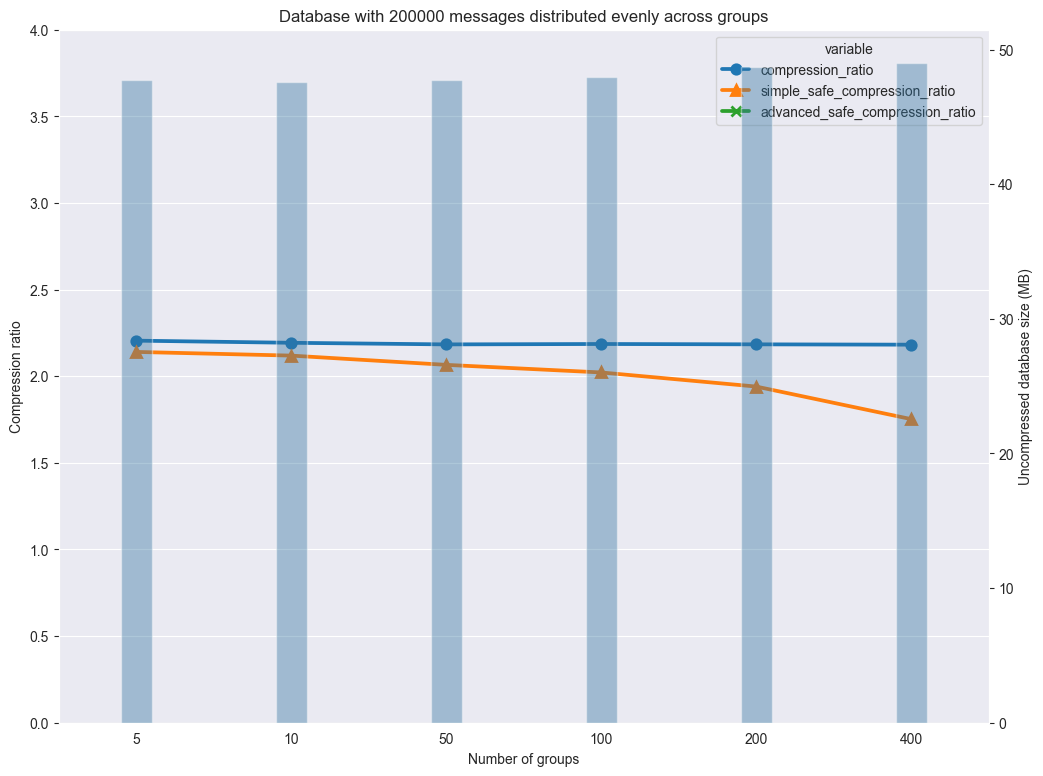

In [42]:
fig = plt.figure(figsize=(12, 9))
ax= fig.gca()
ax2=ax.twinx()
m = 200000

# Uncompressed size
sns.barplot(data[(data.dist == "even") & (data.m == m)], x="n", y="raw_bytes_mb", ax=ax2, width=0.2, alpha=0.4)
ax2.set_ylabel("Uncompressed database size (MB)")
ax2.grid(False)

# Compression ratio
sns.pointplot(ndata[(ndata.dist == "even") & (ndata.m == m)], x="n", y="value", hue="variable", markers=["o", "^", "x"], ax=ax)
ax.set_title(f"Database with {m} messages distributed evenly across groups")
ax.set_ybound(0, 4)
ax.set_xlabel("Number of groups")
ax.set_ylabel("Compression ratio")

fig.savefig("n_plot.png")

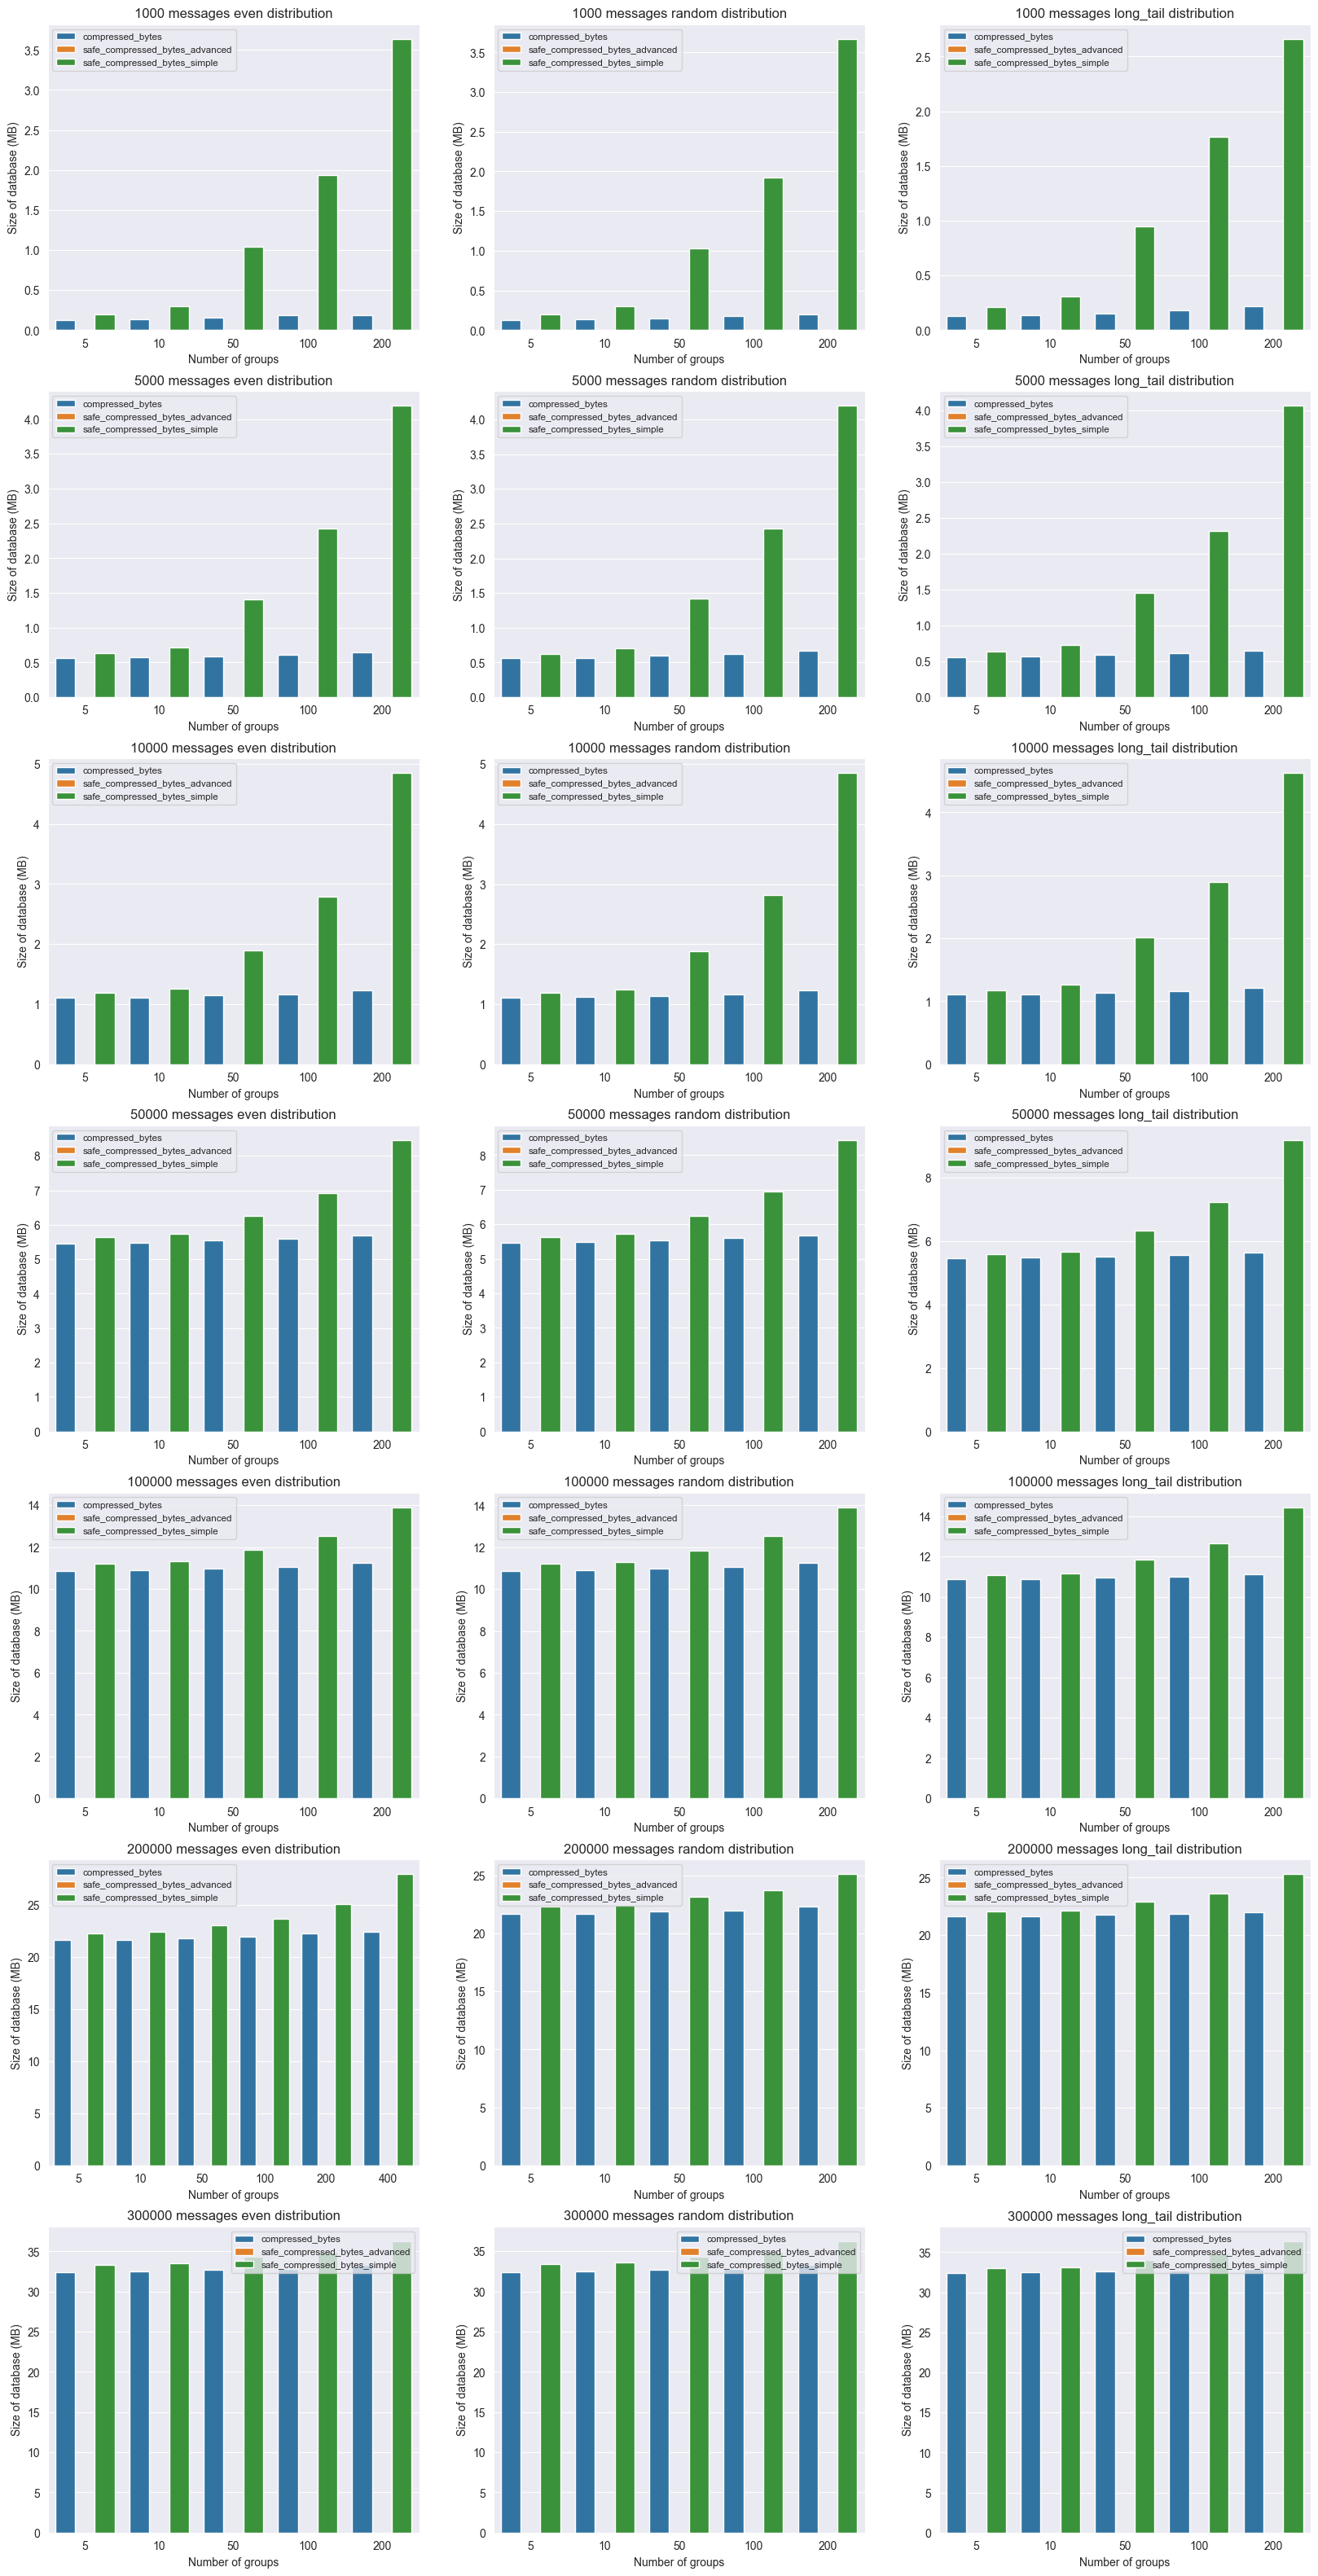

In [40]:
fig, axes = plt.subplots(data.m.nunique(), data.dist.nunique(), figsize=(20, 40))
for i, m in enumerate(data.m.unique()):
    for j, dist in enumerate(data.dist.unique()):
        sns.barplot(mdata[(mdata.m == m) & (mdata.dist == dist)], x="n", y="value_mb", hue="variable", ax=axes[i, j])
        axes[i, j].set_title(f"{m} messages {dist} distribution")
        axes[i, j].set_xlabel("Number of groups")
        axes[i, j].set_ylabel("Size of database (MB)")
        axes[i, j].legend(fontsize="small")
        # axes[i, j].set_ybound(0, 170)
        
plt.savefig("/Users/sjb373/data/secure-compression-framework-lib/sjb_local/stats.png")